# Análisis Exploratorio de Datos

In [26]:
# Instalacion desde el notebook de los  modulos 
%pip install pandas numpy matplotlib seaborn
%pip install kagglehub[pandas-datasets]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
# PASO 1: IMPORTACIÓN DE BIBLIOTECAS Y CONFIGURACIÓN DEL ENTORNO

#   Importar bibliotecas fundamentales
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import re
import pickle

#  Configuracion del entorno de visualización

# Confihura el estilo de seaborn para que los graficos se vean profesionales
# 'whitegrid' es un estilo limpio con lineas cuadiculas sutiles
sns.set_style('whitegrid')

# Configurar la paleta de colores por defecto
# husl proporciona colores que son visualmente distinguibles y agradables
sns.set_palette('husl')

#  Configura el tamaño por defecto de las figuras
#  ancho, alto (en pulgadas). 12 x 6 es un buen tamaño para la mayoría de graficos
plt.rcParams['figure.figsize'] = (12,6)

# Configurar el tamaño de fuente general para mayor legibilidad
plt.rcParams['font.size'] = 11

# Silenciar warmings innnecesarios que pueden confundir
#Filtro: 'ignore' significa que no mostraremos las advertencias
warnings.filterwarnings('ignore')

# Configurar  pandas para mostar  mas columnas en la consola
# Por defecto, pandas trunca la visualizacion. asi vemos todas las columnas.
pd.set_option('display.max_columns', None)

# Configurar el ancho maximo de  las columnas al mostrar datos 
pd.set_option('display.max_colwidth', 100)

print("Bibliotecas importadas y entorno configurado")

Bibliotecas importadas y entorno configurado


In [28]:
# Descarga del dataset desde Kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mrmorj/hate-speech-and-offensive-language-dataset")

print("Dataset downloaded successfully ")
print(f"Location: {path}\n")

# Encontrar CSV y cargar
csv_file = [f for f in os.listdir(path) if f.endswith('csv')][0]

try:
    df = pd.read_csv(f"{path}/{csv_file}")
except:
    df = pd.read_csv(f"{path}/{csv_file}", encoding='latin-1')

print("Dimensions:")
print(f"Columns: {df.shape[1]} ")
print(f"Rows: {df.shape[0]}")

Dataset downloaded successfully 
Location: C:\Users\alexi\.cache\kagglehub\datasets\mrmorj\hate-speech-and-offensive-language-dataset\versions\1

Dimensions:
Columns: 7 
Rows: 24783


In [29]:
# INSPECCIÓN DE LA ESTRUCTURA DEL DATAFRAME
print("\n" + "="*80)
print("FIRST 5 ROWS")
display(df.head())
print("\n" + "="*80)
print("LAST 5 ROWS")
display(df.tail())
print("\n" + "="*80)
print("GENERAL INFORMATION\n")
df.info()
print("\n" + "="*80)
print("COLUMN NAMES ")
columns = df.columns.tolist()
print(f"Total columns: {columns}")
print("\n" + "="*80)
print("DESCRIPTIVE STATISTICS")
display(df.describe(include='all'))
print("\n" + "="*80)
print("UNIQUE VALUES PER COLUMN\n")
print(df.nunique())


FIRST 5 ROWS


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry?...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker ...



LAST 5 ROWS


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @20_Pearls @corey_emanuel right! His TL is trash &#8...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, and drove me redneck crazy"
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I aint fuckin dis up again
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies
24782,25296,3,0,0,3,2,"~~Ruffled | Ntac Eileen Dahlia - Beautiful color combination of pink, orange, yellow &amp; white..."



GENERAL INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB

COLUMN NAMES 
Total columns: ['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither', 'class', 'tweet']

DESCRIPTIVE STATISTICS


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783
unique,NaN,NaN,NaN,NaN,NaN,NaN,24783
top,NaN,NaN,NaN,NaN,NaN,NaN,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a...
freq,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277,NaN
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089,NaN
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000,NaN
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000,NaN
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000,NaN



UNIQUE VALUES PER COLUMN

Unnamed: 0            24783
count                     5
hate_speech               8
offensive_language       10
neither                  10
class                     3
tweet                 24783
dtype: int64


In [30]:
# 1. Eliminación de Columna Redundante (Hallazgo de 'Unnamed: 0')
print("\n" + "="*80)
print("1. LIMPIEZA DE DATOS: Eliminación de Columnas Redundantes")


# El 'Unnamed: 0' es un índice duplicado y no aporta valor predictivo al modelo.
df = df.drop('Unnamed: 0', axis=1) # Usamos axis=1 para indicar que es una columna.

print("Columna 'Unnamed: 0' eliminada.")
print(f"Nuevas columnas restantes: {df.columns.tolist()}")

#2. Transformación: Mapeo de Etiquetas Numéricas a Texto. 
#   Conversión  de codigos a etiquetas legibles 
print("\n" + "="*80)
print("2. MAPEO Y TRANSFORMACIÓN: Mapeo de  la Variable Objetivo 'class'\n")
# Definimos el diccionario de mapeo. Esto es esencial para que el EDA sea legible.
# El modelo usa 0, 1, 2, pero los humanos usan el texto.

class_mapping = {0: 'Hate Speech', 1: 'Offensive Language', 2: 'Neither'}

# Creamos la nueva columna 'class_label' aplicando el mapeo.
df['class_label'] = df['class'].map(class_mapping)

print("Columna 'class_label' creada con etiquetas de texto.")
print("\nVista previa de la traducción:")
display(df[['class', 'class_label', 'tweet']].head())

# 3. Análisis de la Distribución de Clases (Verificación de Desequilibrio)
print("\n" + "="*80)
print("3. ANÁLISIS: DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (DESEQUILIBRIO DE CLASES)")

# Conteo de la frecuencia absoluta (número de tweets por clase).
class_counts = df['class_label'].value_counts()

# Conteo de la frecuencia relativa (porcentaje de tweets por clase).
class_proportions = df['class_label'].value_counts(normalize=True) * 100

# Creamos un DataFrame para una presentación limpia y profesional de los resultados.
class_distribution = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_proportions.round(2).astype(str) + '%'
})

print("Distribución Final de Clases:")
display(class_distribution)

print("\nInterpretación Clave:")
print(" Se confirma un desequilibrio extremo de clases. 'Offensive Language' domina (>77%).")
print("Este es un hallazgo crítico que impactará la selección de métricas y técnicas de muestreo en el modelado.")
print("="*80)


1. LIMPIEZA DE DATOS: Eliminación de Columnas Redundantes
Columna 'Unnamed: 0' eliminada.
Nuevas columnas restantes: ['count', 'hate_speech', 'offensive_language', 'neither', 'class', 'tweet']

2. MAPEO Y TRANSFORMACIÓN: Mapeo de  la Variable Objetivo 'class'

Columna 'class_label' creada con etiquetas de texto.

Vista previa de la traducción:


,class,class_label,tweet
0,2,Neither,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a...
1,1,Offensive Language,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,1,Offensive Language,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry?...
3,1,Offensive Language,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,1,Offensive Language,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker ...



3. ANÁLISIS: DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (DESEQUILIBRIO DE CLASES)
Distribución Final de Clases:


,Count,Percentage
class_label,,
Offensive Language,19190,77.43%
Neither,4163,16.8%
Hate Speech,1430,5.77%



Interpretación Clave:
 Se confirma un desequilibrio extremo de clases. 'Offensive Language' domina (>77%).
Este es un hallazgo crítico que impactará la selección de métricas y técnicas de muestreo en el modelado.


In [31]:
print("\n" + "="*80)
print("4. LIMPIEZA DE TEXTO EN LOS TWEETS")


# Paso 1: Definir una función para limpiar texto
# Esta función toma un tweet y elimina elementos que no aportan valor al análisis
def clean_text(text):
    # Convertir todo el texto a minúsculas para evitar duplicados como "Love" y "love"
    text = text.lower()
    
    # Eliminar URLs (http:// o https://) usando expresiones regulares
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Eliminar menciones de usuarios (@usuario)
    text = re.sub(r'@\w+', '', text)
    
    # Eliminar hashtags (#palabra)
    text = re.sub(r'#\w+', '', text)
    
    # Eliminar signos de puntuación y caracteres especiales
    text = re.sub(r'[^\w\s]', '', text)
    
    # Eliminar números (por ejemplo, años o cantidades)
    text = re.sub(r'\d+', '', text)
    
    # Eliminar espacios extra y dejar solo un espacio entre palabras
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Retornar el texto limpio
    return text

# Paso 2: Aplicar la función a la columna 'tweet'
# Creamos una nueva columna llamada 'clean_tweet' con el texto limpio
df['clean_tweet'] = df['tweet'].apply(clean_text)

# Paso 3: Mostrar ejemplos para verificar que la limpieza funcionó
print(" Tweets limpiados correctamente. Nueva columna 'clean_tweet' creada.")
print("\nEjemplo de transformación:")
display(df[['tweet', 'clean_tweet']].head())



4. LIMPIEZA DE TEXTO EN LOS TWEETS
 Tweets limpiados correctamente. Nueva columna 'clean_tweet' creada.

Ejemplo de transformación:


,tweet,clean_tweet
0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a...,rt as a woman you shouldnt complain about cleaning up your house amp as a man you should always ...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,rt boy dats coldtyga dwn bad for cuffin dat hoe in the st place
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry?...,rt dawg rt you ever fuck a bitch and she start to cry you be confused as shit
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,rt she look like a tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker ...,rt the shit you hear about me might be true or it might be faker than the bitch who told it to ya



1. ANÁLISIS DE LA LONGITUD DE LOS TWEETS
count    24783.000000
mean        85.436065
std         41.548238
min          5.000000
25%         52.000000
50%         81.000000
75%        119.000000
max        754.000000
Name: text_length, dtype: float64


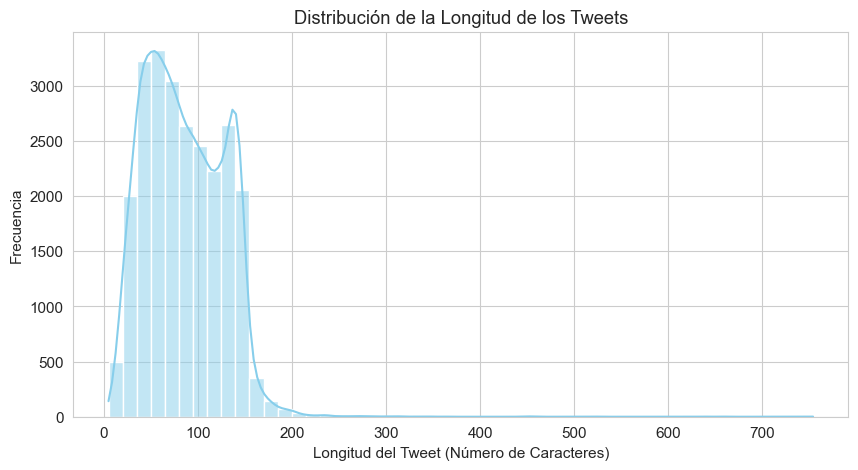


2. VISUALIZACIÓN GRÁFICA DEL DESEQUILIBRIO DE CLASES


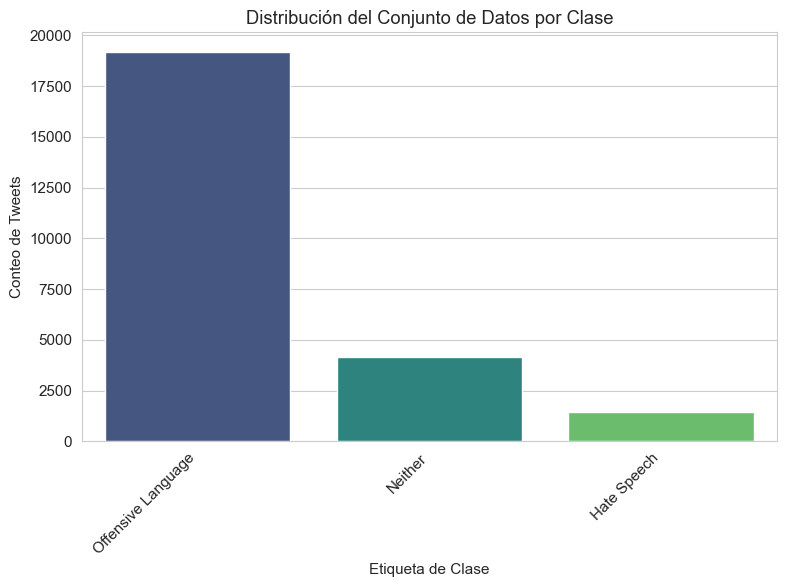

In [32]:
# PASO 5: ANÁLISIS UNIVARIADO Y DE TEXTO (DEL  TWEET)
# ==================================================================== 

print("\n" + "="*80) 
print("1. ANÁLISIS DE LA LONGITUD DE LOS TWEETS") 

# Creamos una nueva columna con la longitud de cada tweet 
df['text_length'] = df['tweet'].astype(str).apply(len) 

print(df['text_length'].describe()) 

# Visualización de la distribución de la longitud 
plt.figure(figsize=(10, 5)) 
sns.histplot(df['text_length'], bins=50, kde=True, color='skyblue') 
plt.title('Distribución de la Longitud de los Tweets') 
plt.xlabel('Longitud del Tweet (Número de Caracteres)') 
plt.ylabel('Frecuencia') 
plt.show() 

# 2. VISUALIZACIÓN DEL DESEQUILIBRIO DE CLASES (Gráfico de Barras) 
print("\n" + "="*80) 
print("2. VISUALIZACIÓN GRÁFICA DEL DESEQUILIBRIO DE CLASES") 

plt.figure(figsize=(8, 6)) 
sns.countplot(x='class_label', data=df, order=df['class_label'].value_counts().index, palette='viridis') 
plt.title('Distribución del Conjunto de Datos por Clase') 
plt.xlabel('Etiqueta de Clase') 
plt.ylabel('Conteo de Tweets') 
plt.xticks(rotation=45, ha='right') # Rotar etiquetas para mejor lectura 
plt.tight_layout() 
plt.show() 
print("="*80) 



5. ANÁLISIS UNIVARIADO DE VARIABLES NUMÉRICAS

Distribución de la variable: count


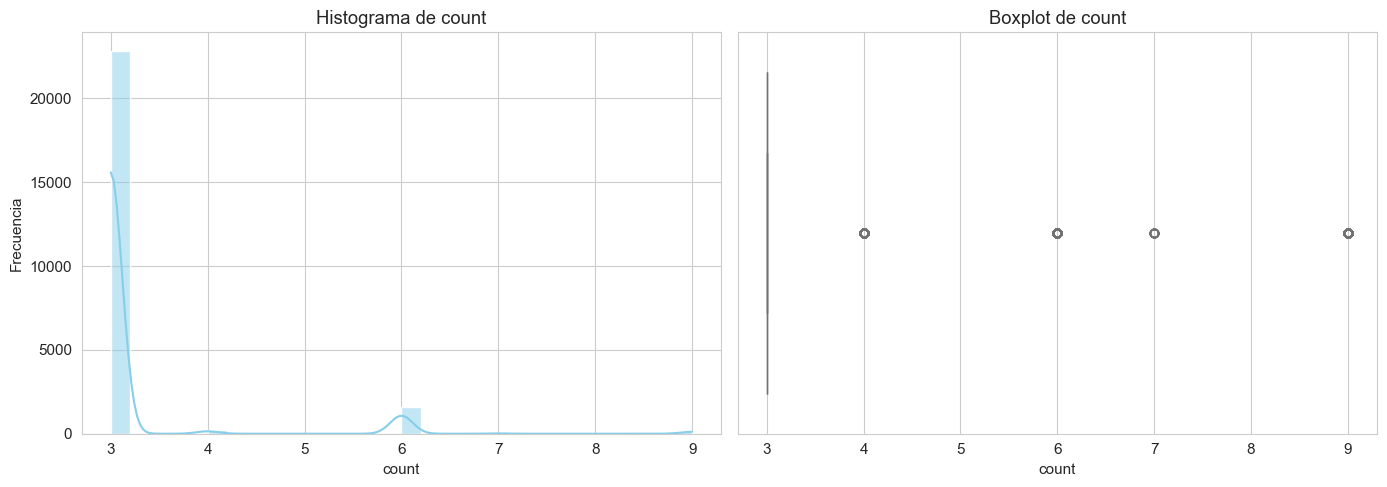


Distribución de la variable: hate_speech


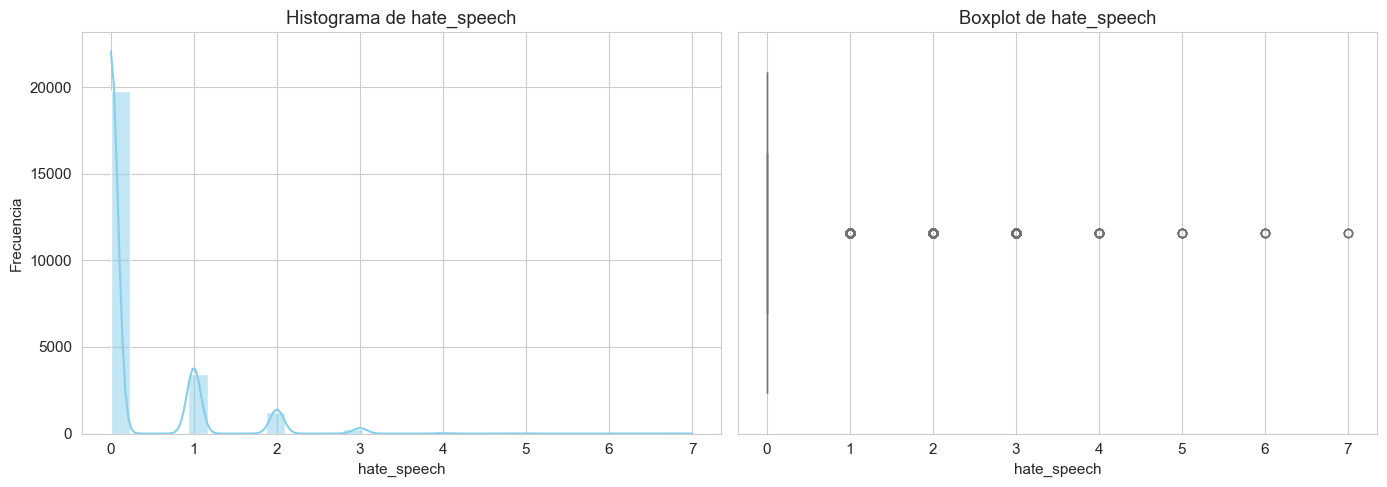


Distribución de la variable: offensive_language


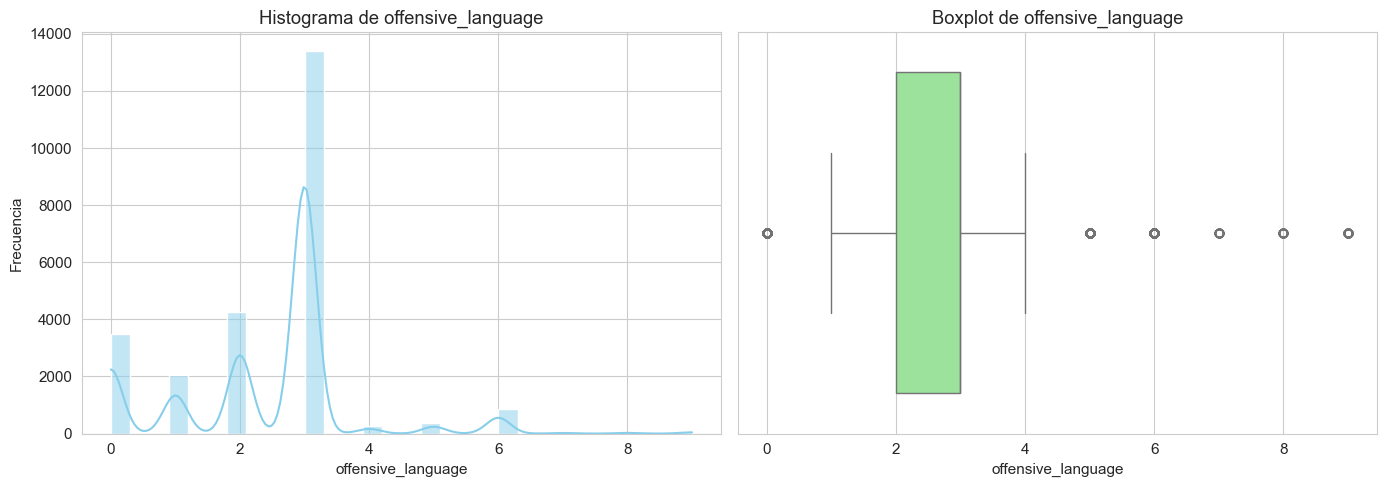


Distribución de la variable: neither


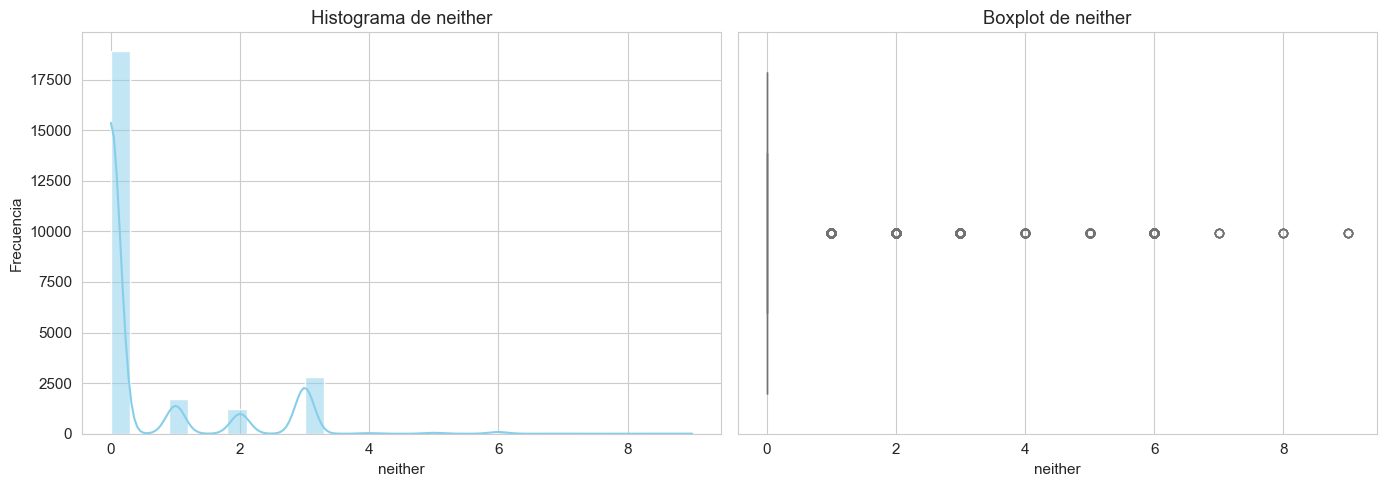


6. ANÁLISIS DE TEXTO: FRECUENCIA GLOBAL DE PALABRAS
Top 20 palabras más frecuentes:


,Palabra,Frecuencia
0,a,9494
1,bitch,8222
2,rt,7634
3,i,7531
4,the,7178
5,you,6111
6,to,5339
7,and,3958
8,my,3582
9,that,3524


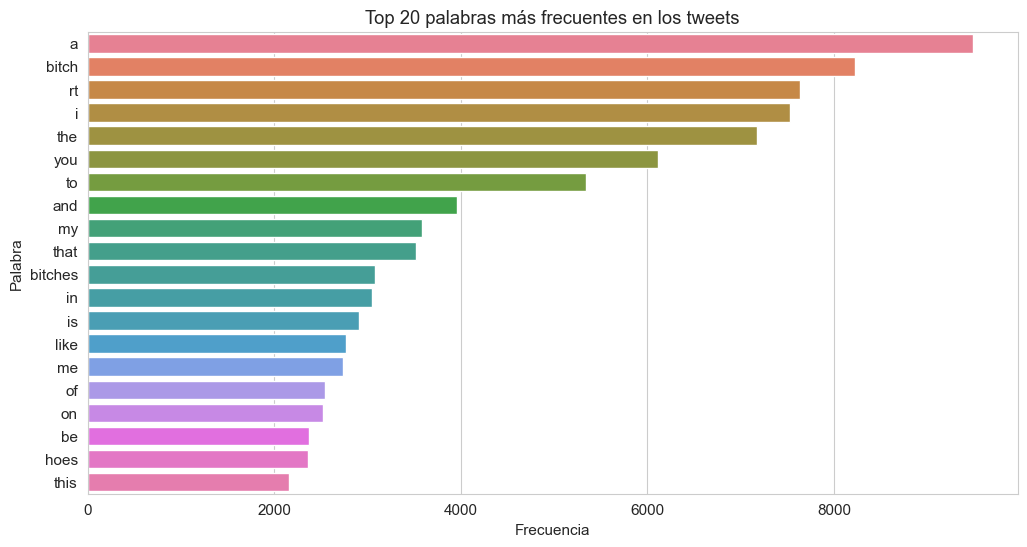


7. ANÁLISIS DE TEXTO POR CLASE

Top palabras en clase: Neither


,Palabra,Frecuencia
0,the,1907
1,a,1363
2,rt,1315
3,i,1057
4,to,1029
5,and,872
6,in,732
7,of,686
8,trash,684
9,is,663


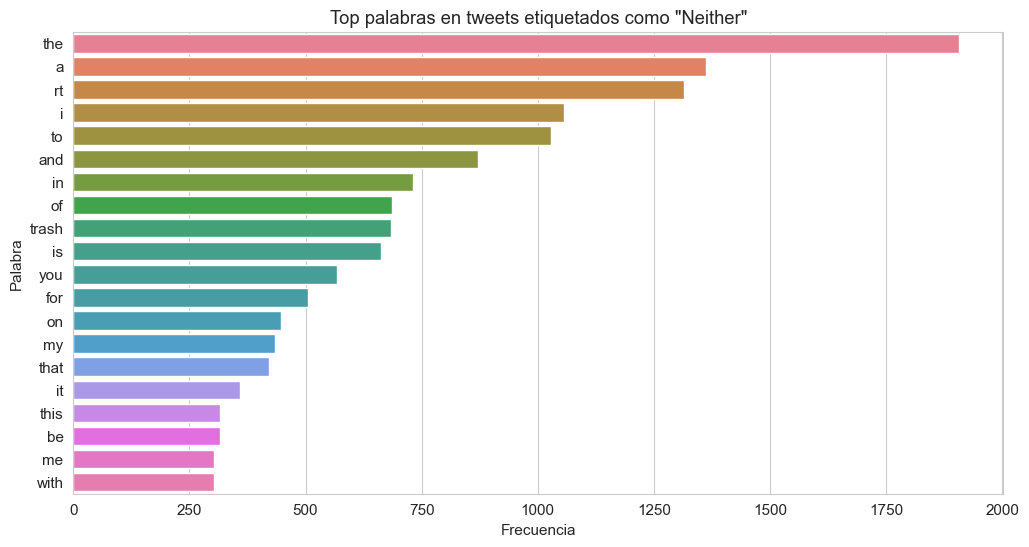


Top palabras en clase: Offensive Language


,Palabra,Frecuencia
0,bitch,8003
1,a,7585
2,i,6125
3,rt,5993
4,you,5109
5,the,4883
6,to,3986
7,bitches,3023
8,my,3003
9,that,2925


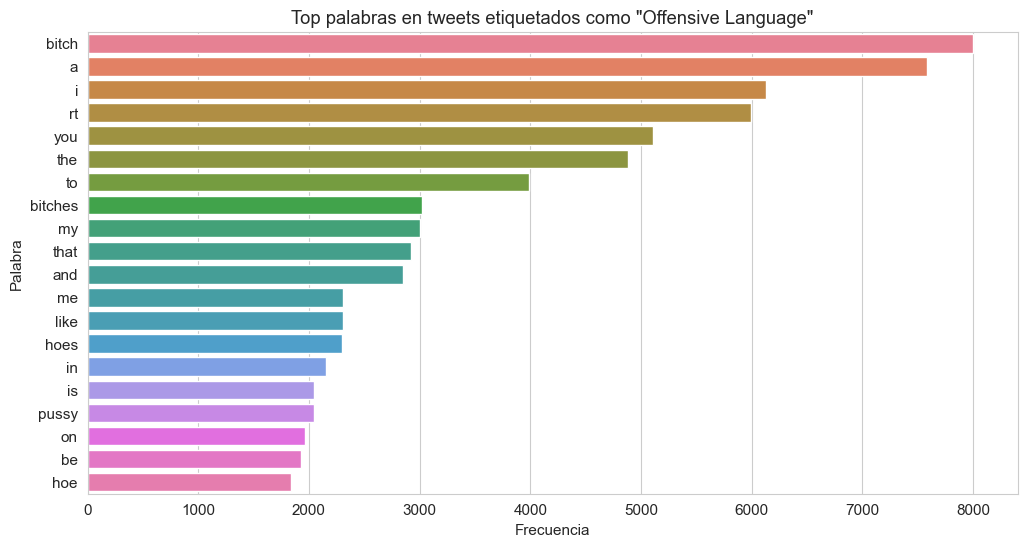


Top palabras en clase: Hate Speech


,Palabra,Frecuencia
0,a,546
1,you,434
2,the,388
3,i,349
4,rt,326
5,to,324
6,and,233
7,bitch,209
8,is,205
9,faggot,185


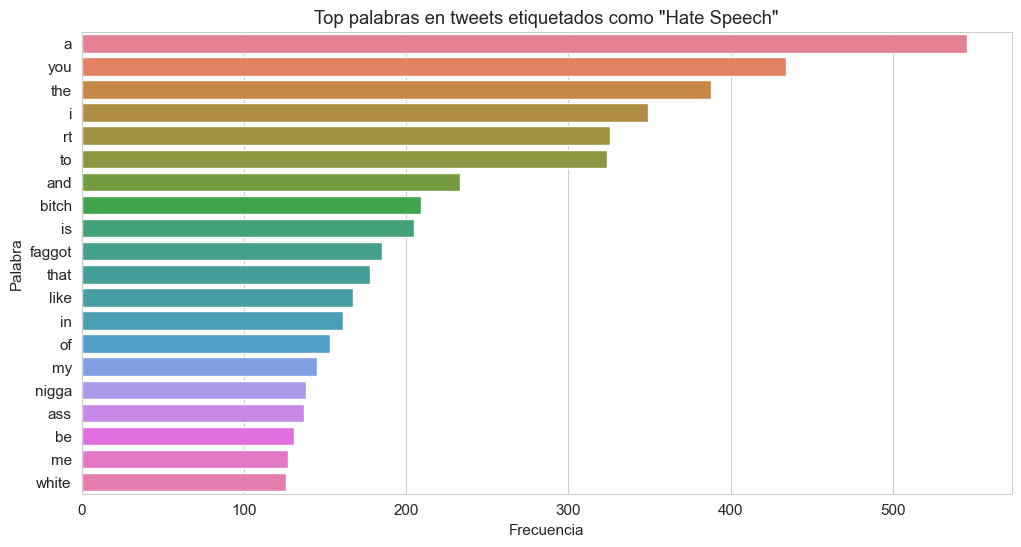

In [33]:
# ==================================================================================
#  5. ANÁLISIS UNIVARIADO DE VARIABLES NUMÉRICAS


print("\n" + "="*80)
print("5. ANÁLISIS UNIVARIADO DE VARIABLES NUMÉRICAS")

# Lista de columnas numéricas que queremos analizar
numeric_cols = ['count', 'hate_speech', 'offensive_language', 'neither']

# Iteramos sobre cada columna para generar visualizaciones
for col in numeric_cols:
    print(f"\nDistribución de la variable: {col}")
    
    # Creamos una figura con dos subplots: histograma y boxplot
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histograma con KDE (curva de densidad) para ver la forma de la distribución
    sns.histplot(df[col], bins=30, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Histograma de {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frecuencia')
    
    # Boxplot para detectar valores atípicos (outliers)
    sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot de {col}')
    axes[1].set_xlabel(col)
    
    # Ajustamos el diseño para evitar superposición
    plt.tight_layout()
    plt.show()


# ==================================================================================
# 🧹 6. ANÁLISIS DE TEXTO: FRECUENCIA GLOBAL DE PALABRAS
# ==================================================================================

print("\n" + "="*80)
print("6. ANÁLISIS DE TEXTO: FRECUENCIA GLOBAL DE PALABRAS")

from collections import Counter

# Unimos todos los tweets limpios en un solo texto
all_words = ' '.join(df['clean_tweet']).split()

# Contamos la frecuencia de cada palabra
word_freq = Counter(all_words)

# Convertimos el resultado en un DataFrame con las 20 palabras más comunes
word_freq_df = pd.DataFrame(word_freq.most_common(20), columns=['Palabra', 'Frecuencia'])

# Mostramos la tabla
print("Top 20 palabras más frecuentes:")
display(word_freq_df)

# Visualizamos con gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x='Frecuencia', y='Palabra', data=word_freq_df, palette='husl')
plt.title('Top 20 palabras más frecuentes en los tweets')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()


# ==================================================================================
# 🧠 7. ANÁLISIS DE TEXTO POR CLASE
# ==================================================================================

print("\n" + "="*80)
print("7. ANÁLISIS DE TEXTO POR CLASE")

# Función para obtener las palabras más frecuentes por clase
def top_words_by_class(label, n=20):
    # Filtramos los tweets que pertenecen a la clase indicada
    subset = df[df['class_label'] == label]
    
    # Unimos todos los textos limpios y los dividimos en palabras
    words = ' '.join(subset['clean_tweet']).split()
    
    # Contamos las palabras más frecuentes
    freq = Counter(words).most_common(n)
    
    # Devolvemos el resultado como DataFrame
    return pd.DataFrame(freq, columns=['Palabra', 'Frecuencia'])

# Iteramos sobre cada clase para mostrar sus palabras más frecuentes
for label in df['class_label'].unique():
    print(f"\nTop palabras en clase: {label}")
    
    # Obtenemos el DataFrame de palabras frecuentes
    top_df = top_words_by_class(label)
    
    # Mostramos la tabla
    display(top_df)
    
    # Visualizamos con gráfico de barras
    plt.figure(figsize=(12,6))
    sns.barplot(x='Frecuencia', y='Palabra', data=top_df, palette='husl')
    plt.title(f'Top palabras en tweets etiquetados como \"{label}\"')
    plt.xlabel('Frecuencia')
    plt.ylabel('Palabra')
    plt.show()
